In [1]:
# 패키지 import
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# 시각화의 선명도를 높임
%config InlineBackend.figure_format = "retina"

# 한글설정
plt.rc('font', family='Malgun Gothic') # 윈도우즈
plt.rc('axes', unicode_minus=False) # 축의 - 깨짐 방지

# 다른 폰트를 기본으로 하려면
import matplotlib.font_manager as fm
font_file = 'C:\Windows\Fonts\BAUHS93.TTF'
font_name = fm.FontProperties(fname=font_file).get_name()
# warning(경고) 안보이게
import warnings
# warnings.filterwarnings(action='ignore')  # 경고 메세지 무시
warnings.filterwarnings(action='default') 

<>:2: DeprecationWarning: invalid escape sequence '\A'
<>:2: DeprecationWarning: invalid escape sequence '\A'
C:\Users\Admin\AppData\Local\Temp\ipykernel_13044\3644735423.py:2: DeprecationWarning: invalid escape sequence '\A'
  df_first = pd.read_csv('C:\Ai_x\download\부동산\전국 평균 평당 분양가격(2013년 9월부터 2015년 8월까지).csv',
C:\Users\Admin\anaconda3\lib\site-packages\matplotlib_inline\config.py:68: DeprecationWarning: InlineBackend._figure_format_changed is deprecated in traitlets 4.1: use @observe and @unobserve instead.
  def _figure_format_changed(self, name, old, new):


<Axes: ylabel='지역'>

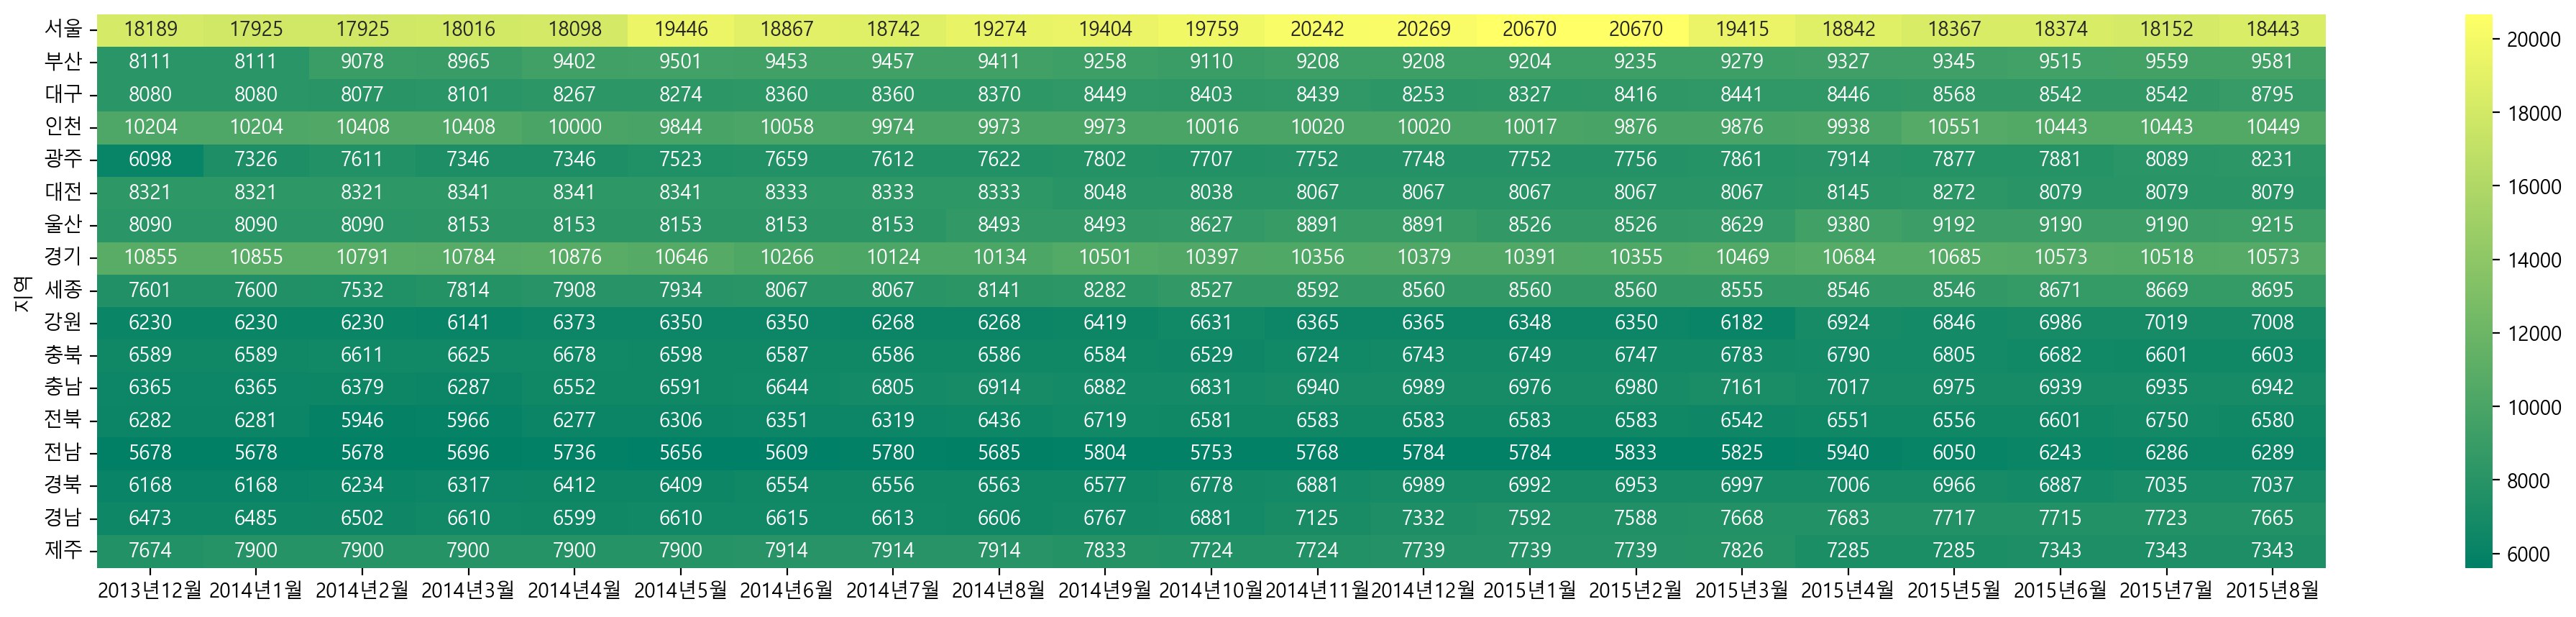

In [2]:
# 문제1번 
df_first = pd.read_csv('C:\Ai_x\download\부동산\전국 평균 평당 분양가격(2013년 9월부터 2015년 8월까지).csv',
                      encoding='cp949')
df_first.sample()
df_first.set_index('지역', inplace=True)
df_first.head()
plt.figure(figsize=(25,5))
sns.heatmap(df_first, annot=True, fmt='d', cmap='summer')

In [3]:
# 문제2번
ex.to_csv('data/전국제곱미터당분양가격(2015년10월부터).csv', index=False)
df_last = pd.read_csv('data/전국제곱미터당분양가격(2015년10월부터).csv')
def commadrop(row):
    pd.options.mode.copy_on_write = True
    price = row['분양가격(제곱미터)']
    if pd.isna(price):   # np.nan 이거나 none 인지 여부
        row['분양가격(제곱미터)'] = np.nan
    elif price.strip() == '': # space 이면 np.nan로
        row['분양가격(제곱미터)'] = np.nan
    elif price.find(',')!=-1: # 콤마가 있으면 콤마 없애기
        row['제곱미터분양가격'] = ''.join(price.split(','))
    else:
        row['제곱미터분양가격'] = price
    return row
commadrop(df_last.loc[0]) # 콤마 제외
commadrop(df_last.loc[1]) # 그대로
commadrop(df_last.loc[28]) # 공백문자의 경우 nan
commadrop(df_last.loc[368]) # nan의 경우 nan

df_last = df_last.apply(commadrop, axis=1)
df_last.head(2)

df_last['제곱미터분양가격'] = df_last['제곱미터분양가격'].astype(np.float64)

df_last.drop(['제곱미터분양가격'], axis=1, inplace=True)

def commadrop2(price):
    if pd.isna(price):
        return np.nan
    elif price.strip() == '':
        return np.nan
    elif price.find(',') != -1:
        return int(price.replace(',',''))
    else:
        return int(price)
commadrop2(df_last.loc[0, '분양가격(제곱미터)']) # 콤마제외한 문자를 숫자로 
commadrop2(df_last.loc[1, '분양가격(제곱미터)']) # 콤마없는 문자를 숫자로 
commadrop2(df_last.loc[28, '분양가격(제곱미터)']) # 공백문자를 nan
commadrop2(df_last.loc[368, '분양가격(제곱미터)']) # nan을 nan

df_last['제곱미터당분양가격']  = df_last['분양가격(제곱미터)'].map(commadrop2)

df_last['평당분양가격']=df_last['제곱미터당분양가격']*3.3

df_last.drop(['제곱미터당분양가격'], axis=1, inplace=True)


df_last.drop(['규모구분'], axis=1, inplace=True)

df_last = df_last[['지역명', '분양가격(제곱미터)', '연도', '월', '평당분양가격']]



df_last

NameError: name 'ex' is not defined